In [1]:
## BSE Sensex India - https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.aspx?flag=1
## Debt, GDP - https://fred.stlouisfed.org/series/GDP

## UK GDP https://www.ons.gov.uk/economy/grossdomesticproductgdp/datasets/monthlygrossdomesticproductbygrossvalueadded

In [2]:
## Import Required Libraries

import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from arch import arch_model
from statsmodels.tsa.api import VAR, VARMAX
from fbprophet import Prophet
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from scipy.stats.distributions import chi2 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from math import sqrt
import time
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
from datetime import timedelta
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
sns.set()

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.



In [3]:
## Import data file

## Exchange Rate Information
us_stock_daily = pd.read_csv("../datadata/nifty_modelling.csv") 
inr_stock_daily = pd.read_csv("../datadata/india_sensex_formodelling.csv")
uk_stock_daily = pd.read_csv("../datadata/LSE_formodelling.csv") 
can_stock_daily = pd.read_csv("../datadata/tse_modelling.csv") 



## check data shapes
print('us_stock_daily' + str(us_stock_daily.shape))
print('inr_stock_daily' + str(inr_stock_daily.shape))
print('uk_stock_daily' + str(uk_stock_daily.shape))
print('can_stock_daily' + str(can_stock_daily.shape))

us_stock_daily(4410, 2)
inr_stock_daily(4411, 2)
uk_stock_daily(4505, 2)
can_stock_daily(4469, 2)


In [4]:
## Set Date Column as index for all

us_stock_daily.Date = pd.to_datetime(us_stock_daily.Date, dayfirst = True)
us_stock_daily.set_index("Date", inplace=True)

us_stock_daily = us_stock_daily.replace(0,np.nan).replace('.',0)
us_stock_daily = us_stock_daily.astype(float)

us_stock_daily = us_stock_daily.resample('B').mean()
us_stock_daily = us_stock_daily.fillna(method='ffill')

####

inr_stock_daily.Date = pd.to_datetime(inr_stock_daily.Date, dayfirst = True)
inr_stock_daily.set_index("Date", inplace=True)

inr_stock_daily = inr_stock_daily.replace(0,np.nan).replace('.',0)
inr_stock_daily = inr_stock_daily.astype(float)

inr_stock_daily = inr_stock_daily.resample('B').mean()
inr_stock_daily = inr_stock_daily.fillna(method='ffill')

####

uk_stock_daily.Date = pd.to_datetime(uk_stock_daily.Date, dayfirst = True)
uk_stock_daily.set_index("Date", inplace=True)

uk_stock_daily = uk_stock_daily.replace(0,np.nan).replace('.',0)
uk_stock_daily = uk_stock_daily.astype(float)

uk_stock_daily = uk_stock_daily.resample('B').mean()
uk_stock_daily = uk_stock_daily.fillna(method='ffill')

####

can_stock_daily.Date = pd.to_datetime(can_stock_daily.Date, dayfirst = True)
can_stock_daily.set_index("Date", inplace=True)

can_stock_daily = can_stock_daily.replace(0,np.nan).replace('.',0)
can_stock_daily = can_stock_daily.astype(float)

can_stock_daily = can_stock_daily.resample('B').mean()
can_stock_daily = can_stock_daily.fillna(method='ffill')


In [5]:
us_stock_daily

,nifty_close
Date,
2004-01-01,1912.25000
2004-01-02,1946.05000
2004-01-05,1955.00000
2004-01-06,1926.70000
2004-01-07,1916.75000
...,...
2021-09-24,18434.18377
2021-09-27,18465.74572
2021-09-28,18497.20220


In [9]:
## Univariate Model for US Stock: Nifty Prediction

us_stock_df = us_stock_daily.reset_index()
us_stock_df.columns = ['ds','y']
us_stock_df['y'] = us_stock_df['y'].astype(float)

train_us_stock = us_stock_df[us_stock_df['ds'] < '2021-05-01']
test_us_stock = us_stock_df[us_stock_df['ds'] >= '2021-05-01']

model_us_stock = Prophet(interval_width=0.95, daily_seasonality=True) ## 95% confidence interval
model_us_stock.fit(train_us_stock)
future_us_stock = model_us_stock.make_future_dataframe(periods=110, freq='B')
forecast_us_stock = model_us_stock.predict(future_us_stock)

result_model_us_stock = pd.DataFrame(test_us_stock.ds)
result_model_us_stock['Actual'] = test_us_stock['y']
result_model_us_stock['Predicted'] = forecast_us_stock['yhat_upper']
print(result_model_us_stock)

             ds       Actual     Predicted
4522 2021-05-03  14634.15000  13810.715685
4523 2021-05-04  14496.50000  13796.039905
4524 2021-05-05  14617.85000  13764.318739
4525 2021-05-06  14724.80000  13765.818798
4526 2021-05-07  14823.15000  13700.977580
...         ...          ...           ...
4626 2021-09-24  18434.18377  14224.596308
4627 2021-09-27  18465.74572  14223.655334
4628 2021-09-28  18497.20220  14303.528324
4629 2021-09-29  18525.15468  14329.869467
4630 2021-09-30  18553.87212  14265.445028

[109 rows x 3 columns]


In [10]:
result_model_us_stock.to_csv('../datadata/results/nifty_answer.csv')

Figure(720x432)
Figure(648x864)


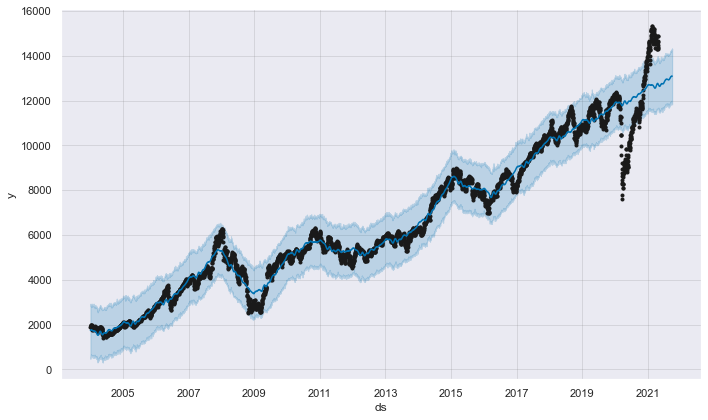

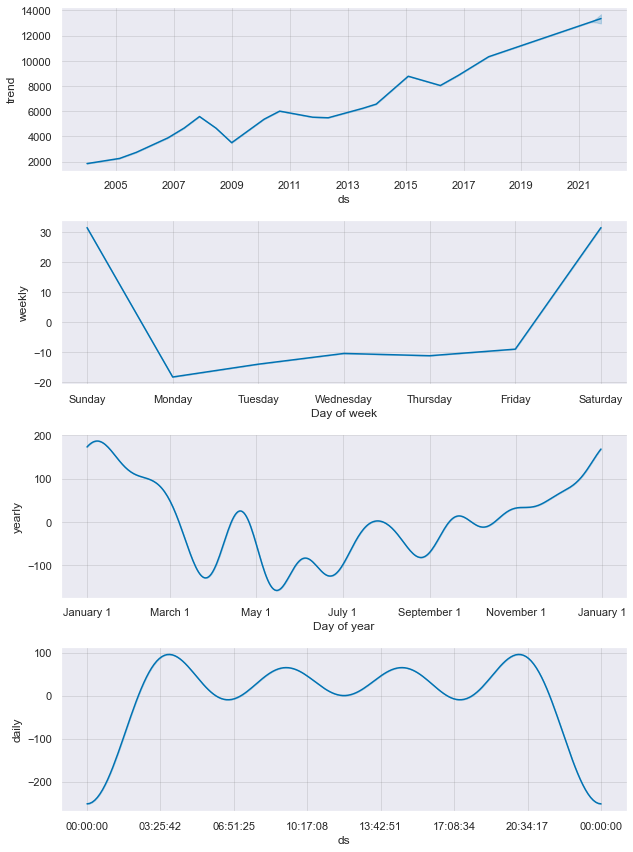

In [11]:
print(model_us_stock.plot(forecast_us_stock))
print(model_us_stock.plot_components(forecast_us_stock))

In [12]:
## Univariate Model for INR Stock: Sensex

inr_stock_df = inr_stock_daily.reset_index()
inr_stock_df.columns = ['ds','y']
inr_stock_df['y'] = inr_stock_df['y'].astype(float)

train_inr_stock = inr_stock_df[inr_stock_df['ds'] < '2021-05-01']
test_inr_stock = inr_stock_df[inr_stock_df['ds'] >= '2021-05-01']

model_inr_stock = Prophet(interval_width=0.95, daily_seasonality=True) ## 95% confidence interval
model_inr_stock.fit(train_inr_stock)
future_inr_stock = model_inr_stock.make_future_dataframe(periods=110, freq='B')
forecast_inr_stock = model_inr_stock.predict(future_inr_stock)

result_model_inr_stock = pd.DataFrame(test_inr_stock.ds)
result_model_inr_stock['Actual'] = test_us_stock['y']
result_model_inr_stock['Predicted'] = forecast_inr_stock['yhat_upper']
print(result_model_inr_stock)

             ds       Actual     Predicted
4522 2021-05-03  14634.15000  46982.166387
4523 2021-05-04  14496.50000  47109.520362
4524 2021-05-05  14617.85000  47062.429822
4525 2021-05-06  14724.80000  47056.349654
4526 2021-05-07  14823.15000  46866.902779
...         ...          ...           ...
4626 2021-09-24  18434.18377  48834.669863
4627 2021-09-27  18465.74572  48813.781744
4628 2021-09-28  18497.20220  48753.761431
4629 2021-09-29  18525.15468  49051.389227
4630 2021-09-30  18553.87212  49059.263445

[109 rows x 3 columns]


In [18]:
result_model_inr_stock.to_csv('../datadata/results/sensex_answer.csv')

Figure(720x432)
Figure(648x864)


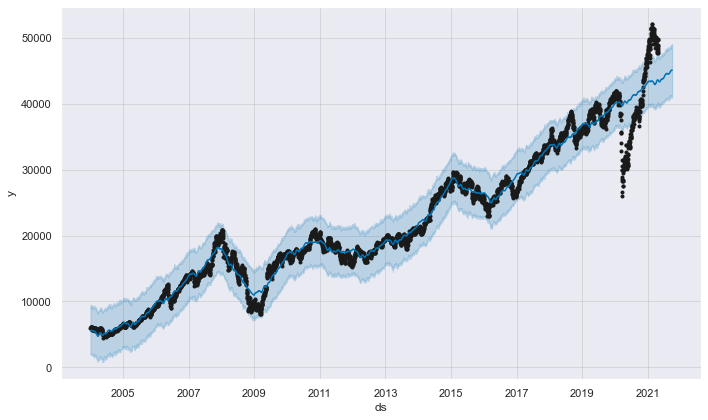

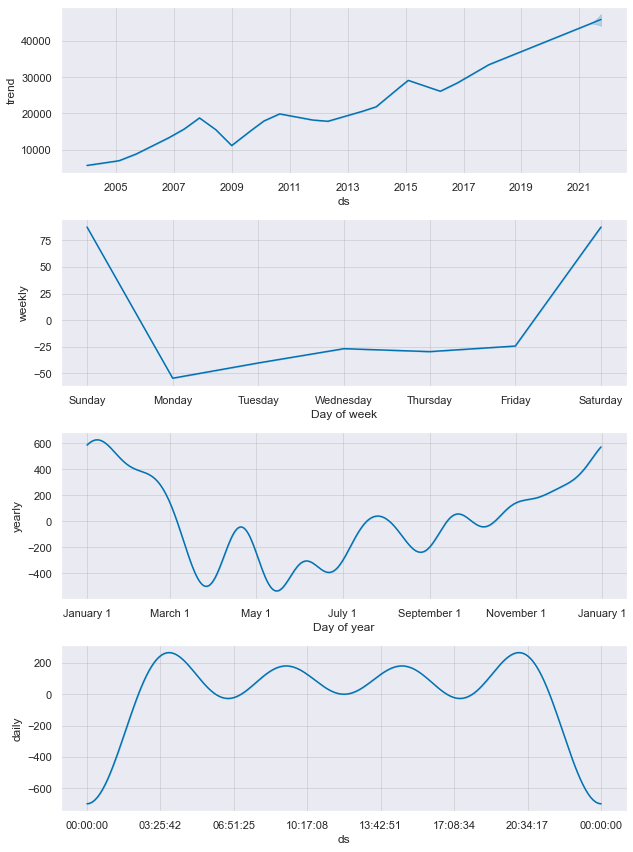

In [19]:
print(model_inr_stock.plot(forecast_inr_stock))
print(model_inr_stock.plot_components(forecast_inr_stock))

In [25]:
## Univariate Model for UK Stock: London Stock Exchage

uk_stock_df = uk_stock_daily.reset_index()
uk_stock_df.columns = ['ds','y']
uk_stock_df['y'] = uk_stock_df['y'].astype(float)

train_uk_stock = uk_stock_df[uk_stock_df['ds'] < '2021-05-01']
test_uk_stock = uk_stock_df[uk_stock_df['ds'] >= '2021-05-01']

model_uk_stock = Prophet(interval_width=0.95, daily_seasonality=True) ## 95% confidence interval
model_uk_stock.fit(train_uk_stock)
future_uk_stock = model_uk_stock.make_future_dataframe(periods=110, freq='B')
forecast_uk_stock = model_uk_stock.predict(future_uk_stock)

result_model_uk_stock = pd.DataFrame(test_uk_stock.ds)
result_model_uk_stock['Actual'] = test_uk_stock['y']
result_model_uk_stock['Predicted'] = forecast_uk_stock['yhat_upper']
print(result_model_uk_stock)

             ds   Actual     Predicted
4522 2021-05-03  7400.00   9948.019443
4523 2021-05-04  7162.00   9924.865869
4524 2021-05-05  7232.00   9897.816458
4525 2021-05-06  7100.00   9962.665999
4526 2021-05-07  7170.00   9963.221348
...         ...      ...           ...
4626 2021-09-24  9132.19  10661.278390
4627 2021-09-27  9149.84  10671.265778
4628 2021-09-28  9167.19  10661.517405
4629 2021-09-29  9184.21  10670.671505
4630 2021-09-30  9200.93  10761.680090

[109 rows x 3 columns]


In [26]:
result_model_uk_stock.to_csv('../datadata/results/lse_answer.csv')

Figure(720x432)
Figure(648x864)


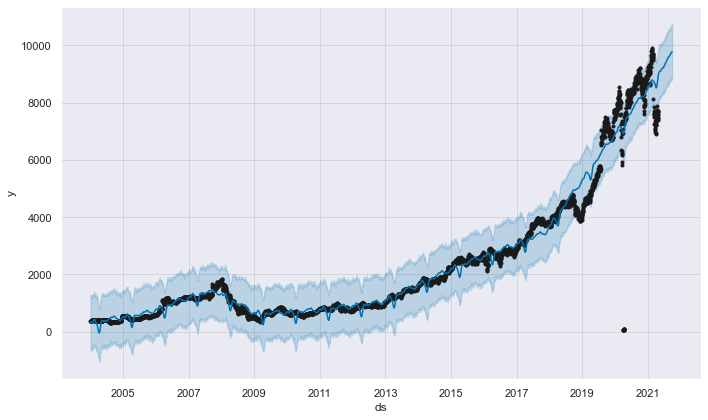

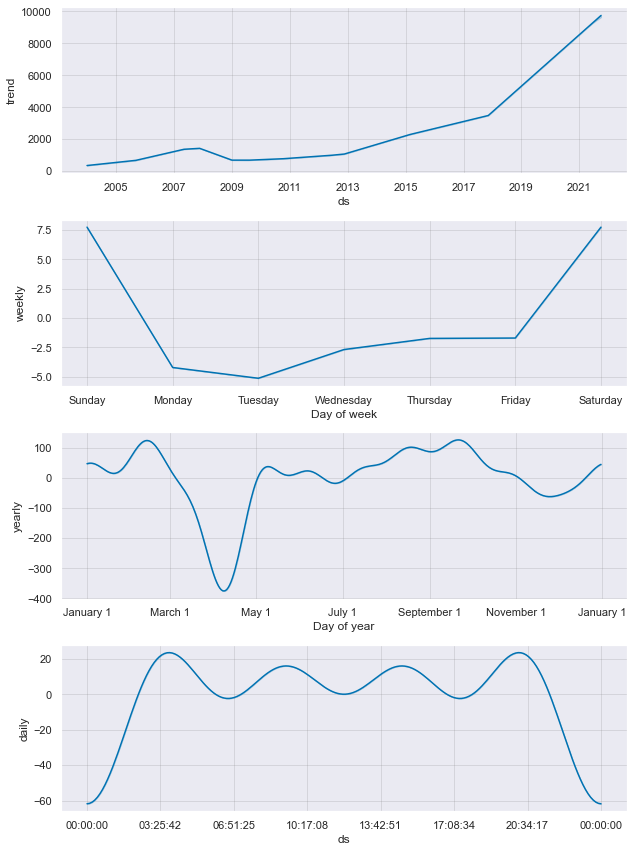

In [27]:
print(model_uk_stock.plot(forecast_uk_stock))
print(model_uk_stock.plot_components(forecast_uk_stock))

In [22]:
## Univariate Model for Canada Stock: Toronto Stock Exchange

can_stock_df = can_stock_daily.reset_index()
can_stock_df.columns = ['ds','y']
can_stock_df['y'] = can_stock_df['y'].astype(float)

train_can_stock = can_stock_df[can_stock_df['ds'] < '2021-05-01']
test_can_stock = can_stock_df[can_stock_df['ds'] >= '2021-05-01']

model_can_stock = Prophet(interval_width=0.95, daily_seasonality=True) ## 95% confidence interval
model_can_stock.fit(train_can_stock)
future_can_stock = model_can_stock.make_future_dataframe(periods=110, freq='B')
forecast_can_stock = model_can_stock.predict(future_can_stock)

result_model_can_stock = pd.DataFrame(test_can_stock.ds)
result_model_can_stock['Actual'] = test_can_stock['y']
result_model_can_stock['Predicted'] = forecast_can_stock['yhat_upper']
print(result_model_can_stock)

             ds       Actual     Predicted
4521 2021-05-03  19213.19922  18300.474122
4522 2021-05-04  19188.00000  18348.706444
4523 2021-05-05  19310.69922  18285.327645
4524 2021-05-06  19291.00000  18344.763229
4525 2021-05-07  19472.69922  18301.525309
...         ...          ...           ...
4625 2021-09-24  19210.36444  18693.731094
4626 2021-09-27  19210.36444  18632.052706
4627 2021-09-28  19210.36444  18497.499204
4628 2021-09-29  19210.36444  18562.748284
4629 2021-09-30  19210.36444  18626.745828

[109 rows x 3 columns]


In [23]:
result_model_can_stock.to_csv('../datadata/results/tse_answer.csv')

Figure(720x432)
Figure(648x864)


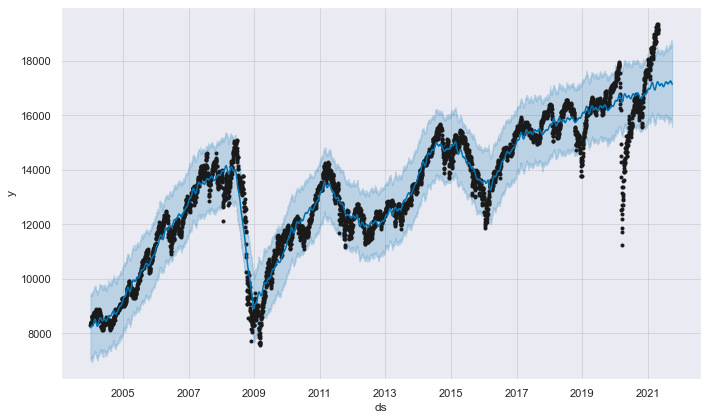

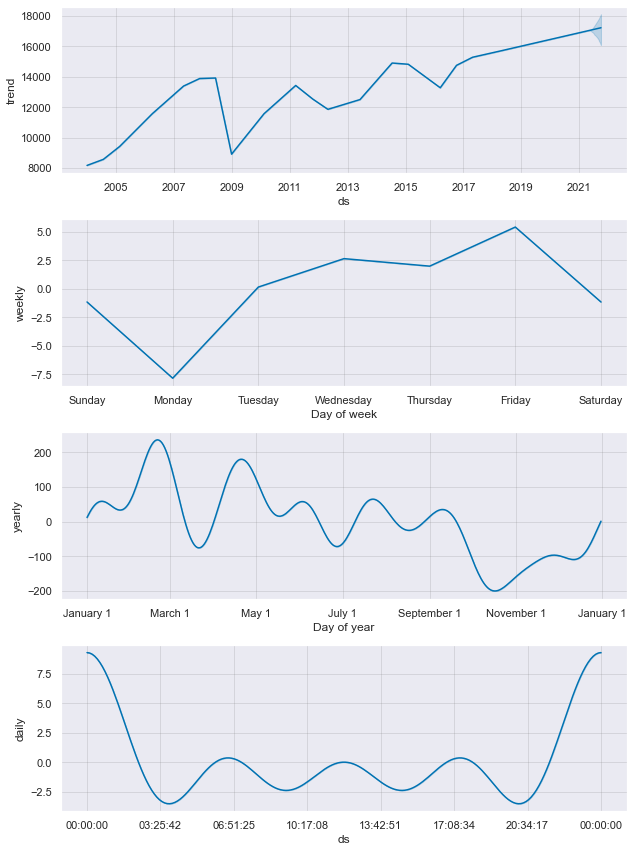

In [24]:
print(model_can_stock.plot(forecast_can_stock))
print(model_can_stock.plot_components(forecast_can_stock))

In [1]:
dd

NameError: name 'test_can_stock' is not defined

In [ ]:
print('RMSE for CAD/USD Monthly Predicitons - Stock,' + str(np.sqrt(mean_squared_error(test_usd_monthly['y'],forecast_usd_monthly[-5:]['yhat']))))
print('RMSE for CAD/INR Monthly Predicitons - Stock,' + str(np.sqrt(mean_squared_error(test_inr_monthly['y'][:2],forecast_inr_monthly[-5:-3]['yhat_lower']))))
print('RMSE for CAD/GBP Monthly Predicitons - Stock,' + str(np.sqrt(mean_squared_error(test_gbp_monthly['y'],forecast_gbp_monthly[-5:]['yhat']))))